In [1]:
#imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import subprocess
import sys
# change to your caffe root
caffe_root='/Users/zhuang/caffe/'
sys.path.insert(0,caffe_root+'python')

In [3]:
import os
import cv2
import caffe

In [4]:
model_root = './'
img_root = './imgs/'
img_path = img_root + 'yoga.png'

In [5]:
def checkModelExist():
    # check if model exists
    if os.path.isfile(model_root + 'det50.caffemodel'):
        print 'model found.'
    else:
        print 'model not found'

In [6]:
def loadAndResizeImage(image_path):
    img = cv2.imread(image_path, 0)
    longest_side = 480
    height, width = img.shape[:2]
    scale = 1.0 * longest_side / max(height, width)
    resized_image = cv2.resize(img, (0,0), fx = scale, fy = scale)
    return (resized_image, scale)

In [11]:
# image quality Set up model
def calculateBoneStructure(image):
    caffe.set_mode_cpu()
    model_def = model_root + 'det50.prototxt'
    model_weights = model_root + 'det50.caffemodel'
    bone_net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)
    mu = np.array([120.2599734, 129.036626861, 132.387003387])# BGR
    # create transformer for the input called 'data'
    transformer = caffe.io.Transformer({'data': bone_net.blobs['data'].data.shape})

    transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
    transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
    transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
    transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR
    image = caffe.io.resize_image(image, (224,224), interp_order=3 )
    transformed_image = transformer.preprocess('data', image)
    bone_net.blobs['data'].data[...] = transformed_image
    output = bone_net.forward()
    print output

In [12]:
def calculateOneFrame(image_path):
    resized_image, scale = loadAndResizeImage(image_path)
    
    image = caffe.io.load_image(image_path)
    plt.imshow(image)
   
    bone_structure = calculateBoneStructure(image)
    return bone_structure
    

In [13]:
def main():
    checkModelExist()
    
    video_frame_paths = ""
    result = []
    if (len(video_frame_paths) > 0):
        
        for i in range(len(video_frame_paths)):
            output = calculateOneFrame(video_frame_paths[i])
            result.append(output)
    else:
        output = calculateOneFrame(img_path)
        result.append(output)
    
    print result;
    
    

model found.
{'softmax': array([[5.17769365e-07, 1.81949417e-07, 3.71557348e-06, 8.14036696e-07,
        1.00563884e-05, 1.42519366e-06, 6.06257800e-06, 2.10737676e-06,
        1.78881024e-07, 2.08349575e-05, 2.19053309e-08, 6.87135696e-07,
        1.55072669e-07, 1.49111457e-07, 5.53364953e-06, 4.02221190e-08,
        6.06954274e-08, 3.48587273e-05, 1.04938235e-05, 1.11741906e-06,
        2.53371269e-07, 1.85950512e-06, 2.64814644e-05, 1.22728397e-05,
        6.63717856e-07, 3.28636247e-07, 5.74292017e-07, 3.98345236e-07,
        1.98546968e-06, 1.97960929e-07, 6.17077433e-07, 2.62157613e-07,
        6.65207267e-08, 2.57903281e-07, 1.76294252e-05, 3.44098538e-07,
        6.41066663e-06, 1.79612144e-07, 1.55514533e-06, 1.63523191e-06,
        2.21213122e-06, 7.45758484e-07, 7.21605247e-05, 3.34731999e-06,
        7.14713849e-07, 3.04111040e-07, 1.59465787e-06, 1.55369253e-06,
        1.06320606e-07, 1.08670326e-06, 3.87132695e-06, 2.79378510e-05,
        1.47263756e-06, 6.61090871e-06,

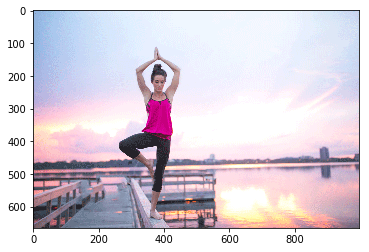

In [14]:
main()